In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.shape[0]

1338

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.drop(["region","children"],axis=1,inplace=True)

In [9]:
df.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


In [10]:
# encoding
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df["sex"]=lab.fit_transform(df["sex"])
df["smoker"]=lab.fit_transform(df["smoker"])


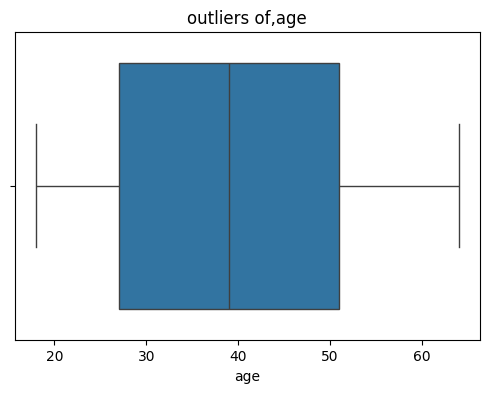

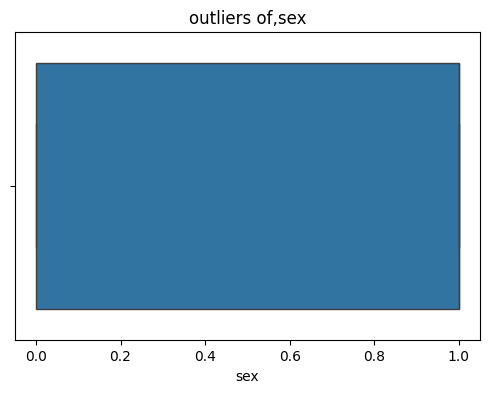

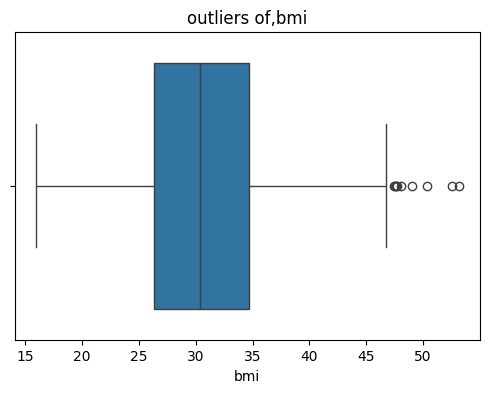

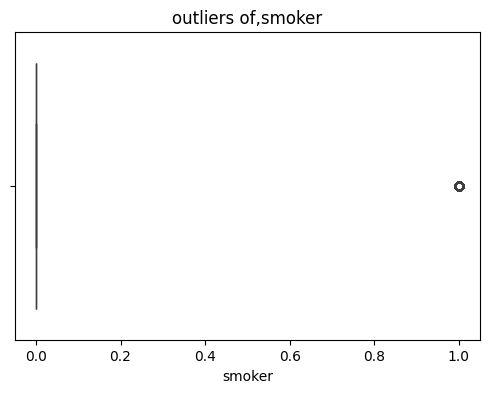

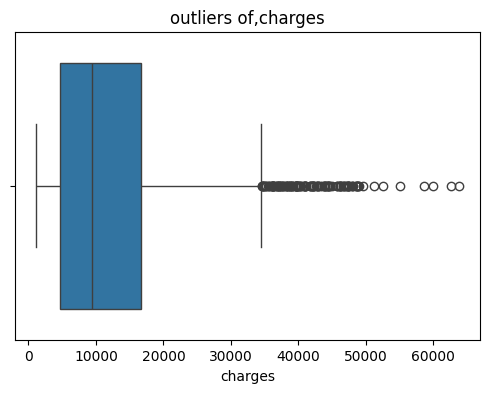

In [11]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i])
    plt.title(f"outliers of,{i}")

In [12]:
x=df.drop(["charges"],axis=1)
y=df["charges"]

In [13]:
x

,age,sex,bmi,smoker
0,19,0,27.900,1
1,18,1,33.770,0
2,28,1,33.000,0
3,33,1,22.705,0
4,32,1,28.880,0
...,...,...,...,...
1333,50,1,30.970,0
1334,18,0,31.920,0
1335,18,0,36.850,0
1336,21,0,25.800,0


In [14]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<Axes: xlabel='age', ylabel='charges'>

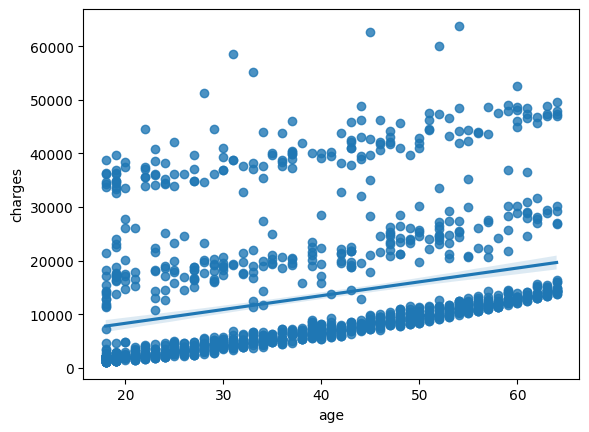

In [15]:
sns.regplot(x=df["age"],y=y)

<Axes: xlabel='bmi', ylabel='charges'>

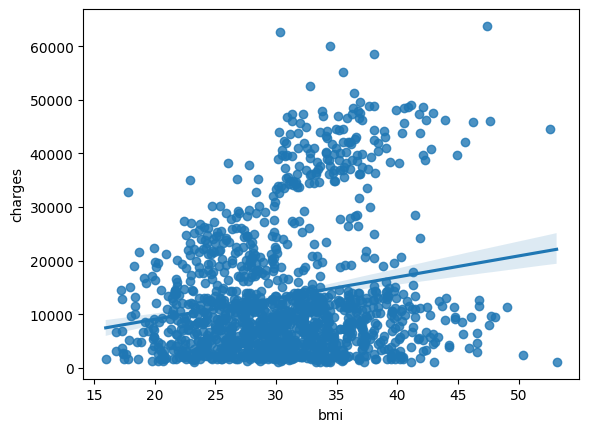

In [16]:
sns.regplot(x=df["bmi"],y=y)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,age,sex,bmi,smoker
332,61,0,31.160,0
355,46,1,27.600,0
138,54,0,31.900,0
381,55,1,30.685,1
292,25,1,45.540,1
...,...,...,...,...
1095,18,0,31.350,0
1130,39,0,23.870,0
1294,58,1,25.175,0
860,37,0,47.600,1


In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.svm import SVR
sv=SVR()
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


In [ ]:

    

models = [
    ('Linear Regression', lr),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('Support Vector Machine', sv)
]

# Print table header with fixed width columns
print(f"{'Model':<25} {'MAE':>10} {'MAPE':>15} {'RMSE':>15} {'R2 Score':>10}")
print("-" * 75)

for name, model in models:
    model.fit(x_train, y_train)
    output_predict = model.predict(x_test)
    mae = mean_absolute_error(y_test, output_predict)
    mape = mean_absolute_percentage_error(y_test, output_predict)
    rmse = np.sqrt(mean_squared_error(y_test, output_predict))
    r2 = r2_score(y_test, output_predict)
    
    # Print each model's results aligned under the header
    print(f"{name:<25} {mae:10.4f} {mape:15.4f} {rmse:15.4f} {r2:10.4f}")


Model                            MAE            MAPE            RMSE   R2 Score
---------------------------------------------------------------------------
Linear Regression          4207.6907          0.4595       5868.9131     0.7651
Decision Tree              3289.9259          0.5642       6684.6141     0.6952
Random Forest              2791.3333          0.4152       4951.4706     0.8328
Support Vector Machine     8224.2422          1.0212      12592.7409    -0.0815


In [27]:
import joblib
joblib.dump(rf,"insurance_model.pkl")
print("model saved sucessfully")

model saved sucessfully


In [28]:
def predict_insurance():
    # name=input('enter your name')
    age=int(input("enter your age"))
    sex=input("are you male or female").lower()
    smoker_or_not=input("are you a smoker").lower()
    bmi=float(input("enter your bmi"))
    # children=int(input("enter the no fo children"))
    sex=1 if sex=="male" else 0
    smoker_or_not=1 if smoker_or_not=="yes" else 0
    new_df = pd.DataFrame({
    "age": [age], 
    "sex": [sex], 
    "bmi": [bmi], 
    "smoker": [smoker_or_not], 
})
    model = joblib.load("insurance_model.pkl")

    predicted_cost = model.predict(new_df)
    print(predicted_cost)

predict_insurance()
    
    
    

[2549.3523742]
